In [21]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import ipywidgets as widgets
from functools import cache
from matplotlib.gridspec import GridSpec
from utils.utils import load_from_yaml
import re
import numpy as np

from pathlib import Path
%matplotlib widget
# %matplotlib inline
PATH = "d:checkpoints"
@cache
def load_image(img_file):
    return mpimg.imread(img_file)
dir = list(glob(f'{PATH}/**/gen_images/', recursive=True))

interactive(children=(Dropdown(description='Image Dir:', options=('d:checkpoints\\IncrementalStyleGan\\1\\gen_…

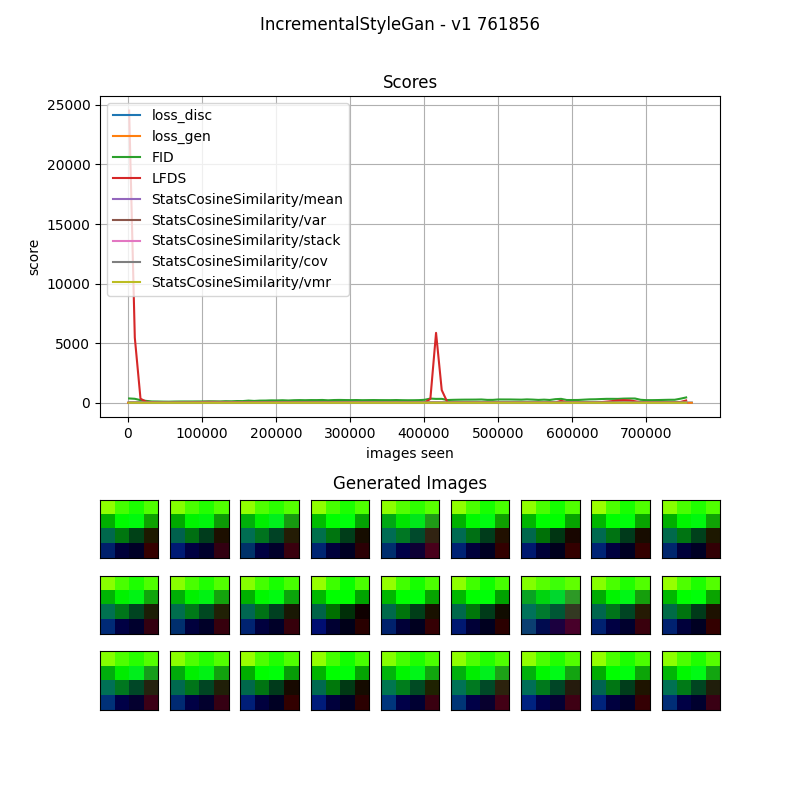

In [22]:

fig = plt.figure(figsize=(8,8))

start_steps = len(list(glob(f"{dir[0]}/*")))-1
img_file=widgets.Dropdown(options=dir, value=dir[0], description='Image Dir:')
step_slide=widgets.IntSlider(
    # interval=10,
    min=0, max=start_steps, 
    step=1, value=start_steps, disabled=False,
    continuous_update=False
    )
samples_slide=widgets.IntSlider(min=1, max=10, step=1,value=3,continuous_update=False)
y_plot_limit=widgets.FloatRangeSlider(min=-50., max=50., step=1,value=(-0.5,1.), continuous_update=False)
text_filter=widgets.Text(value='', placeholder='\\w+', description='RegEx Filter:', disabled=False)
log_scale=widgets.Checkbox(value=False, description='Log Scale', disabled=False)
def on_update_folder(*args):
    folders = list(glob(f"{img_file.value}/*"))
    steps = len(folders)-1
    step_slide.max = steps
    step_slide.value = steps
img_file.observe(on_update_folder, 'value')

# def on_update_step(*args):
#     step_slide.value = step_slide.value + 1

@widgets.interact(
                folder=img_file,
                samples=samples_slide,
                step=step_slide,
                # y_limit=y_plot_limit,
                )
def show(folder, 
         samples = 3, 
        #  y_limit=(-0.5,1.),
         filter=text_filter,
         step=0, 
         log_scale=log_scale,
         ):
    num_rows, num_cols = samples, samples*3
    fig.clear()
    sub_folders = list(glob(f"{folder}/*"))
    sub_folders.sort(key=lambda x: int(Path(x).name))
    curr_folder = Path(sub_folders[step])
    *_, conf, version, _, at_time = curr_folder.parts
    gs = GridSpec(nrows=2, ncols=1, height_ratios=[3, 2], hspace=0.3)
    data_folder = Path(folder).parent/"history"/f"{at_time}"/"meta.json"
    fig.suptitle(f'{conf} - v{version} {at_time}')
    ax1 = fig.add_subplot(gs[0])
    if data_folder.exists():
        data = load_from_yaml(data_folder)
        # print(data)
        # Add the graph to the top of the plot
        for name, values in data.items():
            if isinstance(values, list) and re.findall(filter, name):
                # if isinstance(values, list):
                x, y = zip(*values)
                if log_scale:
                    y = np.log(y)
                ax1.plot(x, y, label=name)
        ax1.legend(loc='upper left')
        ax1.set_xlabel('images seen')
        if log_scale:
            ax1.set_ylabel('log score')
        else:
            ax1.set_ylabel('score')
        ax1.set_title('Scores')
        ax1.grid(True)
        # ax1.set_ylim(y_limit)
    else:
        ax1.set_title('No data found')


    # Add the grid of images to the bottom of the plot
    ax2 = fig.add_subplot(gs[1])
    ax2.axis('off')
    ax2.set_title('Generated Images')
    gs2 = gs[1].subgridspec(num_rows, num_cols)
    images = list(glob(f'{curr_folder}/*.png'))
    for x in range(num_rows):
        for y in range(num_cols):
            ax2 = fig.add_subplot(gs2[x, y], xticks=[], yticks=[])
            if x*num_cols+y < len(images):
                img = load_image(images[x*num_cols+y])
                ax2.imshow(img)


    # plt.show()


In [3]:
import random 
from torchvision import transforms
from PIL import Image
fig = plt.figure(figsize=(8,8))
images = glob(f'data/flowers-102/jpg/*.jpg')
random.shuffle(images)
@widgets.interact(
            step=widgets.IntSlider(
                min=0, max=8, step=1,
                value=0,
                continuous_update=False,
            ),
            num_rows=widgets.IntSlider(
                min=1, max=10, step=1,
                value=5,
                continuous_update=False,
            ),
            num_cols=widgets.IntSlider(
                min=1, max=10, step=1,
                value=5,
                continuous_update=False,
            ),
)
def show(num_rows = 10, num_cols = 10, step=0):
    fig.clear()
    fig.suptitle(f'real images')
    image_size = 4*2**(step)
    fig.suptitle(f'size {image_size} x {image_size}')
    resize = transforms.Resize((image_size, image_size))
    for i, img_file in enumerate(images[:num_rows*num_cols]):
        fig.add_subplot(num_rows, num_cols, i+1)
        img = Image.open(img_file)
        plt.imshow(resize(img))
        plt.axis('off')

<Figure size 800x800 with 0 Axes>

interactive(children=(IntSlider(value=5, continuous_update=False, description='num_rows', max=10, min=1), IntS…